# Kinect vs. Vicon


**Vicon & Kinect data obtained by post stroke volunteer while playing a Serius Game.**

>*By KOBYLARZ, J - 
Group of Science and Technology of motor control, PUCPR*



###Import Python Modules

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

###Manage CSV


> Here some important part of project I opened it in Excel the Vicon file and pre-selected the part containing the highlighters values in time.


In [0]:
#Importing CSV files

#Kinect
kinect_link = "https://drive.google.com/open?id=1Bb3-A-YFvX9QzO5MVFY7PNo6OQn9nWK8"
fluff, id = kinect_link.split('=')

kinect_downloaded = drive.CreateFile({'id':id}) 
kinect_downloaded.GetContentFile('Trajetoria-Marcelo-Cabeceio28-01-2019-03-06.csv')  

#Creating pandas Dataframe
kinect_csv = pd.read_csv('Trajetoria-Marcelo-Cabeceio28-01-2019-03-06.csv')

In [0]:
#Importing CSV files

#Vicon
vicon_link = "https://drive.google.com/open?id=1LAhYxV83Mm9wY77F2RpmsmWeQAD9hUEs"
fluff, id = vicon_link.split('=')

vicon_downloaded = drive.CreateFile({'id':id}) 
vicon_downloaded.GetContentFile('A_08_Col_01.csv')

#Creating pandas Dataframe
vicon_csv = pd.read_csv('A_08_Col_01.csv')

In [6]:
kinect_csv.columns = ['Angle', 'Throw', 'Catch']

kinect_csv.head()

,Angle,Throw,Catch
0,-12.24,0,0
1,-12.24,0,0
2,-5.67,0,0
3,-5.67,0,0
4,-5.67,0,0


In [7]:
vicon_csv.head()

,Unnamed: 0,Unnamed: 1,A_08b:LAH,Unnamed: 3,Unnamed: 4,A_08b:RAH,Unnamed: 6,Unnamed: 7,A_08b:VERT,Unnamed: 9,...,A_08:RANK,Unnamed: 81,Unnamed: 82,A_08:RHEE,Unnamed: 84,Unnamed: 85,A_08:RTOE,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,Frame,Sub Frame,X,Y,Z,X,Y,Z,X,Y,...,X,Y,Z,X,Y,Z,X,Y,Z,NaN
1,NaN,NaN,mm,mm,mm,mm,mm,mm,mm,mm,...,mm,mm,mm,mm,mm,mm,mm,mm,mm,NaN
2,1,0,103.922,379.185,1686.18,101.115,476.105,1698.77,227.861,419.546,...,334.758,665.028,84.5873,355.619,606.934,55.9965,162.107,697.255,44.5107,NaN
3,2,0,104.026,379.289,1686.23,101.161,476.209,1698.8,227.943,419.631,...,334.754,665.024,84.563,355.64,606.889,56.0474,162.128,697.248,44.4955,NaN
4,3,0,104.062,379.394,1686.29,101.237,476.346,1698.86,228.025,419.721,...,334.772,665.015,84.5989,355.599,606.932,56.0166,162.139,697.267,44.4726,NaN


> Creating a dataframe from Vicon file with just the Highlighters that matters to calculate the Angle.


In [8]:
#We will get the highlighters Stern(X,Y), Sacro(X,Y), LASI(X,Y) and RASI(X,Y)

new_vicon_csv = vicon_csv.filter(['A_08b:STERN','Unnamed: 24','A_08:LASI', 'Unnamed: 45', 'A_08:RASI', 'Unnamed: 48', 'A_08:SACR', 'Unnamed: 51'], axis=1)

#Rename the columns

new_vicon_csv.rename(columns={'A_08b:STERN':'STERN_X',
                              'Unnamed: 24':'STERN_Y',
                              'A_08:LASI':'LASI_X',
                              'Unnamed: 45':'LASI_Y',
                              'A_08:RASI':'RASI_X',
                              'Unnamed: 48':'RASI_Y',
                              'A_08:SACR':'SACR_X',
                              'Unnamed: 51':'SACR_Y'},inplace=True)

new_vicon_csv.head()

,STERN_X,STERN_Y,LASI_X,LASI_Y,RASI_X,RASI_Y,SACR_X,SACR_Y
0,X,Y,X,Y,X,Y,X,Y
1,mm,mm,mm,mm,mm,mm,mm,mm
2,147.559,434.92,123.069,271.349,154.298,590.177,341.8,411.194
3,147.563,434.974,123.057,271.422,154.305,590.225,341.811,411.264
4,147.572,435.046,123.023,271.44,154.288,590.262,341.776,411.313


##Math

> Ok, so now that we get our database organized the way we wanted, we can calculate the vectors and the get our angle in Vicon data to compare with Kinect data frame.

> The way we are going to calculate the angle is the same way that Kinect get its data, just simply doing law of the cosines

> Procedure

> 1.   STERN_Y - SACR_Y = CO
> 2.   (LASI or RASI)_X - SACR_X = CB
> 3.   COˆ2 + CBˆ2 = HIP^2
> 4.   Angle = cosˆ-1((( COˆ2 - ( CBˆ2 + HIPˆ2)) / (-2 * HIP * CB))))







In [0]:
import numpy as np

new_vicon_csv.drop([0, 1], inplace = True)
new_vicon_csv.index = range(new_vicon_csv.shape[0])


In [10]:
#Apply to every Series the function to_numeric from Pandas, cause the dtype is an object, then there is no agreement of variable types:

CO_1=pd.to_numeric(new_vicon_csv['STERN_Y'])
CO_2=pd.to_numeric(new_vicon_csv['SACR_Y'])

CB_1=pd.to_numeric(new_vicon_csv['RASI_X'])
CB_2=pd.to_numeric(new_vicon_csv['SACR_X'])

CO = CO_1 - CO_2
CB = CB_1 - CB_2
HIP = np.sqrt(CO*CO + CB*CB)

#Instantiating a new column called 'Angle' with the values of the calculated angles:

new_vicon_csv['Angle'] = np.degrees(np.arccos((CO**2 - CB**2 - HIP**2)/(-2.0 * HIP * CB)))

new_vicon_csv.head()

,STERN_X,STERN_Y,LASI_X,LASI_Y,RASI_X,RASI_Y,SACR_X,SACR_Y,Angle
0,147.559,434.92,123.069,271.349,154.298,590.177,341.8,411.194,172.788273
1,147.563,434.974,123.057,271.422,154.305,590.225,341.811,411.264,172.793238
2,147.572,435.046,123.023,271.44,154.288,590.262,341.776,411.313,172.785635
3,147.555,435.117,123.02,271.485,154.242,590.301,341.773,411.343,172.774943
4,147.566,435.213,123.049,271.546,154.194,590.348,341.768,411.374,172.757042


##Graphs

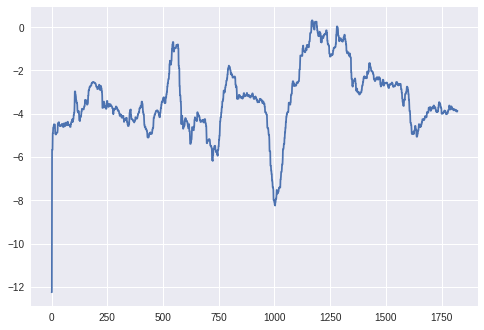

In [11]:
#Just kinect angle in time

kinect_csv['Angle'].plot()

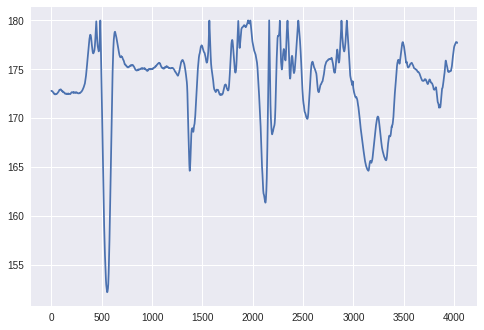

In [12]:
#Vicon angle of movement in time

new_vicon_csv['Angle'].plot()

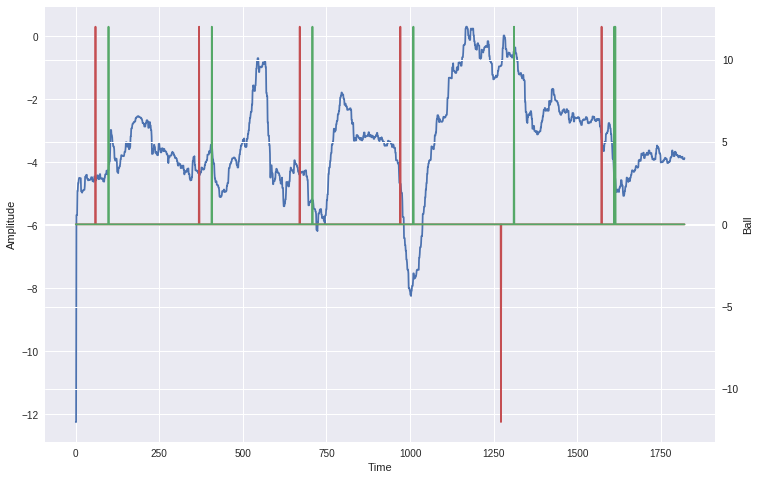

In [61]:
#All Kinect movement { Blue : Angle, Red: Throw, Green : Catch} 

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(111)

ax1.set_xlabel('Time')
ax1.set_ylabel('Amplitude', color='k')
ax1.plot(kinect_csv['Angle'], color='b')
ax2 = ax1.twinx() 

ax2.set_ylabel('Ball', color='k')
ax2.plot(kinect_csv['Throw']*12, color='r')
ax2.plot(kinect_csv['Catch']*12, color='g')
ax2.tick_params(axis='y', labelcolor='k')

plt.show()